# HW 4

## Problem 1

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.special as sp
import math
from astropy import units as u

In [3]:
def f(z):
    baryon_photon_ratio = 6e-10
    T_0 = 2.3525e-4
    m_e = .511e6
    E_I = 13.6

    part1 = 2 * sp.zeta(3) * (math.pi)**-2 * baryon_photon_ratio
    part2 = ((2 * math.pi * T_0 * (1+z))/m_e)**(3/2)
    part3 = np.exp(E_I/(T_0*(1+z)))

    return part1 * part2 * part3

def X_e(z):
    numerator = -1 + np.sqrt(1 + 4*f(z))
    denominator = 2*f(z)
    return numerator/denominator

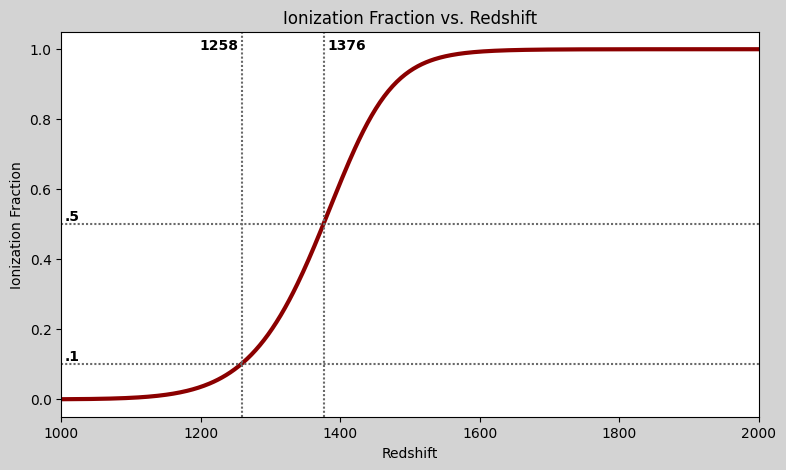

In [4]:
zs = np.linspace(1000,2000,500)
X_es = X_e(zs)

fig,ax = plt.subplots(figsize = (9,5))
fig.set_facecolor('lightgray')

ax.set_title('Ionization Fraction vs. Redshift')
ax.set_ylabel('Ionization Fraction')
ax.set_xlabel("Redshift")
ax.set_xlim([1000,2000])

ax.plot(zs, X_es, color='darkred', linewidth=3)

ax.axhline(y=.1, color='dimgrey', linestyle=(0,(1,1)))
ax.text(1005, .11, '.1', fontsize=10, fontweight='bold')

z_1 = zs[np.argmin((X_es-.1)**2)]
ax.axvline(x=z_1, color='dimgrey', linestyle=(0,(1,1)))
ax.text(z_1 - 60, 1, str(int(z_1)), fontsize=10, fontweight='bold')

ax.axhline(y=.5, color='dimgrey', linestyle=(0,(1,1)))
ax.text(1005, .51, '.5', fontsize=10, fontweight='bold')

z_5 = zs[np.argmin((X_es-.5)**2)]
ax.axvline(x=z_5, color='dimgrey', linestyle=(0,(1,1)))
ax.text(z_5+5, 1, str(int(z_5)), fontsize=10, fontweight='bold')

plt.show()

In [9]:
# find ionization fraction at z = 303
X_e(1200)

0.035611415332973254

## Problem 3

In [6]:
import scipy.integrate as integrate

In [7]:
def Y_eq(x):
    return np.power(np.divide(x,2*math.pi),3/2)*np.exp(-x)

def Y_unnormal(x, l):
    def f(x):
        return l * x * np.divide(x,x+2) * Y_eq(x)
    
    return integrate.quad(f, 10**-20, x)[0]

def Y(x,l):
    return Y_unnormal(x=x,l=l) + (10**-20 - Y_unnormal(x=.01,l=l))

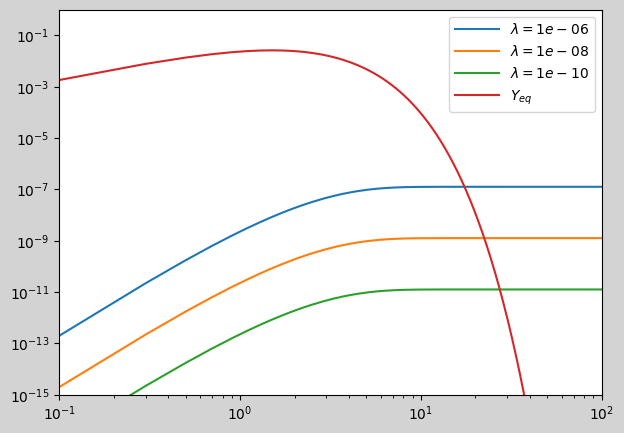

In [15]:
fig,ax = plt.subplots(figsize=(7,5))
fig.set_facecolor('lightgray')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([.1,100])
ax.set_ylim([10**-15,1])


xs = np.linspace(.1,100,500)
for l in (10**-6, 10**-8, 10**-10):
    ax.plot(xs, [Y(x,l) for x in xs], label = f'$\lambda = {l}$')

ax.plot(xs, [Y_eq(x) for x in xs], label = '$Y_{eq}$')
ax.legend(handlelength=3.2,title_fontsize=11.5)